In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import statsmodels.api as sma
import seaborn as sns
sns.set_theme()

In [2]:
#read file
data= pd.read_csv("Coffee_company.csv")

In [3]:
data.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Beverages,United States of America,Robusta,None,2427.75,$3.90,$26.00,"$42,081.00",$-,"$42,081.00","$21,040.50","$16,185.00",01/01/2021,1,January,2021
1,Beverages,Switzerland,Robusta,None,1981.50,$3.90,$26.00,"$34,346.00",$-,"$34,346.00","$17,173.00","$13,210.00",01/01/2021,1,January,2021
2,Snacks,Japan,Robusta,None,3267.00,$3.90,$19.50,"$42,471.00",$-,"$42,471.00","$28,314.00","$10,890.00",01/06/2021,6,June,2021
3,Snacks,Switzerland,Robusta,None,1332.00,$3.90,$19.50,"$17,316.00",$-,"$17,316.00","$11,544.00","$4,440.00",01/06/2021,6,June,2021
4,Snacks,Belgium,Robusta,None,3705.00,$3.90,$19.50,"$48,165.00",$-,"$48,165.00","$32,110.00","$12,350.00",01/06/2021,6,June,2021


In [4]:
len(data.index)

1575

In [5]:
#set time index
data['Date']=data['Date'].str.replace('/', '-')
data['Date']=pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [6]:
#clean the column names, and sales columns
data.columns=data.columns.str.replace(' ', '')
data['Sales']=data['Sales'].str.replace('$', '').str.replace(',', '')

In [7]:
data['Sales']=pd.to_numeric(data['Sales'], errors='coerce')

In [8]:
#form a table
datap=pd.pivot_table(index='Date', columns='Product', values='Sales', data=data)

In [9]:
datap.head()

Product,Arabica,Blue Mountain Coffee,Bourbon,Caturra,Robusta,Typica
Date,,,,,,
2021-01-01,43309.586000,470429.289,27216.861667,228276.7400,40357.655,440626.786
2021-02-01,828824.100000,30894.812,240816.226000,734961.5000,22062.800,8903.916
2021-03-01,12352.486000,157485.387,19757.494000,537726.5400,536974.620,30801.654
2021-04-01,220593.621667,138334.015,53140.698000,233276.8425,282752.648,746946.330
2021-05-01,25646.572000,407189.618,19874.251667,252692.5720,28555.995,475242.602


In [10]:
#clean the column names
datap.columns=datap.columns.str.replace(' ', '')

In [11]:
len(datap.index)

36

In [12]:
datap['BlueMountainCoffee'].sum()

9635996.067833332

In [13]:
#fit the data for each product
from statsmodels.api import tsa as smt
models={i:smt.ETSModel(datap[i], trend="add", seasonal="add").fit() for i in datap.columns}
fitted=pd.DataFrame({i:models[i].fittedvalues for i in models.keys()})
forecasts=pd.DataFrame({i:models[i].forecast() for i in models.keys()})
datap.index.freq='MS'

c:\Users\const\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\const\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\const\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\const\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\const\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

In [14]:
#check the forecast
forecasts['Arabica']

2024-01-01    261073.571464
Freq: MS, Name: Arabica, dtype: float64

<Axes: title={'center': 'Arabica Actual vs Fitted Values'}, xlabel='Date'>

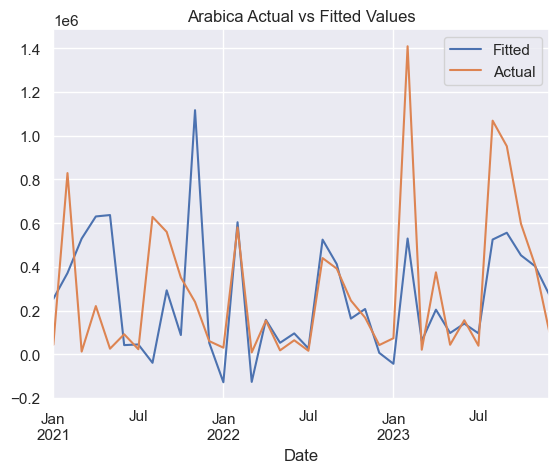

In [18]:
#check the data from the fitted model with the actual
pd.concat([fitted['Arabica'].rename('Fitted'), datap['Arabica'].rename('Actual')], axis=1).plot(title='Arabica Actual vs Fitted Values')

In [22]:
#estimate the covariance of residuals
residuals_cov=(datap-fitted).cov()
residuals_cov

Product,Arabica,BlueMountainCoffee,Bourbon,Caturra,Robusta,Typica
Product,,,,,,
Arabica,1.077422e+11,-4.575295e+10,2.962104e+10,4.958809e+10,-7.089748e+09,-1.024678e+10
BlueMountainCoffee,-4.575295e+10,4.817686e+10,-9.976458e+09,-2.009111e+10,-3.381279e+09,2.221782e+10
Bourbon,2.962104e+10,-9.976458e+09,4.042435e+10,9.008560e+09,6.228852e+09,-1.041362e+09
Caturra,4.958809e+10,-2.009111e+10,9.008560e+09,1.047225e+11,-3.821863e+09,-3.463889e+10
Robusta,-7.089748e+09,-3.381279e+09,6.228852e+09,-3.821863e+09,3.412353e+10,8.922804e+09
Typica,-1.024678e+10,2.221782e+10,-1.041362e+09,-3.463889e+10,8.922804e+09,8.256991e+10


In [23]:
#check forecasts
forecasts

,Arabica,BlueMountainCoffee,Bourbon,Caturra,Robusta,Typica
2024-01-01,261073.571464,1.016148e+06,166023.973281,551984.079144,284611.643187,829612.611667


## Visualise the Distribution of Products

In [24]:
#set the seed
rng=np.random.default_rng(seed=1)

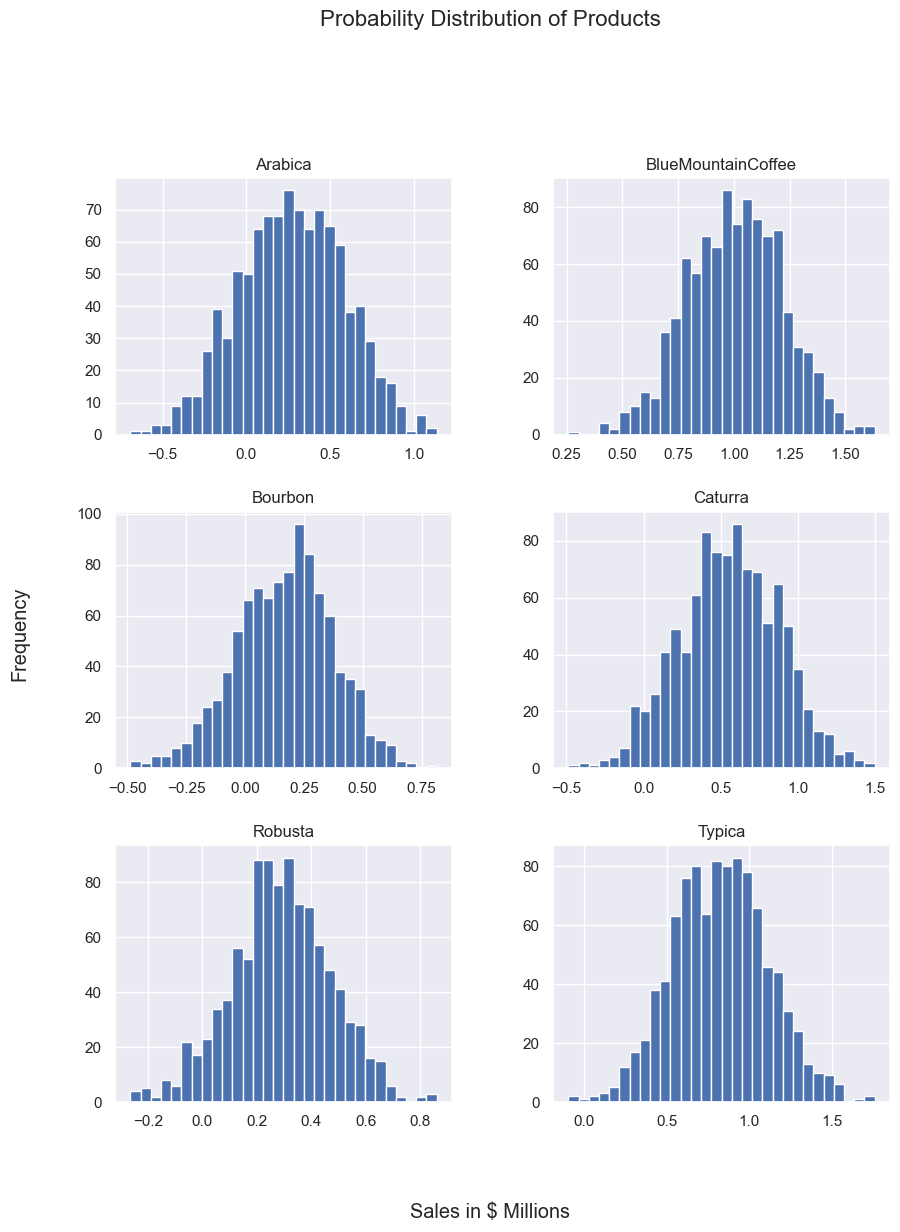

In [42]:
#shows the probability distribution of forecasted values based on randomly generated numbers of the forecasts and the covariance matrix
#produce forecast distribution for each product
n_sample=1000
datap_sim=rng.multivariate_normal(forecasts.values.squeeze(), residuals_cov, size=n_sample)
dist_fore=pd.DataFrame(datap_sim, columns=forecasts.columns)
dist_fore_m = dist_fore / 1e6  #Convert to millions
dist_fore1 = dist_fore_m.hist(figsize=(10,12), bins=30)

fig = dist_fore1[0][0].figure  #Get the figure object from any axis

# Set a super title and shared axis labels
fig.suptitle('Probability Distribution of Products', fontsize=16, y=1.02)
fig.supxlabel('Sales in $ Millions')
fig.supylabel('Frequency')

mp.show()

In [27]:
#calculate standard deviation of forecasted values
std_val=dist_fore.std()
std_val_ind=pd.DataFrame([std_val], columns=std_val.index)
std_val_ind

,Arabica,BlueMountainCoffee,Bourbon,Caturra,Robusta,Typica
0,324877.613534,217334.221662,198999.805654,333826.073015,186407.01179,277990.46397


In [ ]:
#sample the regression parameters - this will show us the distribution of the forecasted sales for the new year with randomly simulated numbers
a=rng.normal(forecasts['Arabica'], std_val_ind['Arabica'], size=n_sample)
b=rng.normal(forecasts['BlueMountainCoffee'], std_val_ind['BlueMountainCoffee'], size=n_sample)
br=rng.normal(forecasts['Bourbon'], std_val_ind['Bourbon'], size=n_sample)
c=rng.normal(forecasts['Caturra'], std_val_ind['Caturra'], size=n_sample)
r=rng.normal(forecasts['Robusta'], std_val_ind['Robusta'], size=n_sample)
t=rng.normal(forecasts['Typica'], std_val_ind['Typica'], size=n_sample)

In [29]:
#calculate the distribution of total sales
total_sales=(a*dist_fore['Arabica']+b*dist_fore['BlueMountainCoffee']+br*dist_fore['Bourbon']+c*dist_fore['Caturra']+r*dist_fore['Robusta']+t*dist_fore['Typica'])

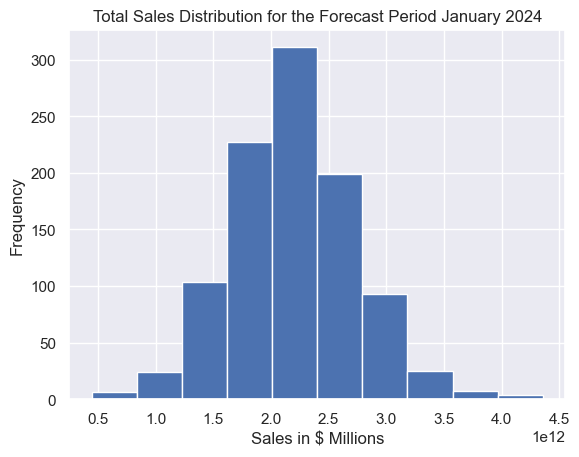

In [44]:
pd.Series(total_sales).hist()
mp.title('Total Sales Distribution for the Forecast Period January 2024')  
mp.xlabel('Sales in $ Millions')                  
mp.ylabel('Frequency')
mp.show()

## Profit Predictions using Classification

In [46]:
#data cleaning and sorting
data.head()

,Segment,Country,Product,DiscountBand,UnitsSold,ManufacturingPrice,SalePrice,GrossSales,Discounts,Sales,COGS,Profit,Date,MonthNumber,MonthName,Year
0,Beverages,United States of America,Robusta,None,2427.75,$3.90,$26.00,"$42,081.00",$-,42081.0,"$21,040.50","$16,185.00",2021-01-01,1,January,2021
1,Beverages,Switzerland,Robusta,None,1981.50,$3.90,$26.00,"$34,346.00",$-,34346.0,"$17,173.00","$13,210.00",2021-01-01,1,January,2021
2,Snacks,Japan,Robusta,None,3267.00,$3.90,$19.50,"$42,471.00",$-,42471.0,"$28,314.00","$10,890.00",2021-06-01,6,June,2021
3,Snacks,Switzerland,Robusta,None,1332.00,$3.90,$19.50,"$17,316.00",$-,17316.0,"$11,544.00","$4,440.00",2021-06-01,6,June,2021
4,Snacks,Belgium,Robusta,None,3705.00,$3.90,$19.50,"$48,165.00",$-,48165.0,"$32,110.00","$12,350.00",2021-06-01,6,June,2021


In [47]:
#clean profit data 
data['Profit']=data['Profit'].str.replace('$', '').str.replace(',', '')
data['ManufacturingPrice']=data['ManufacturingPrice'].str.replace('$', '').str.replace(',', '')
data['SalePrice']=data['SalePrice'].str.replace('$', '').str.replace(',', '')

In [48]:
#change to numeric
data['Profit']=pd.to_numeric(data['Profit'], errors='coerce')
data['ManufacturingPrice']=pd.to_numeric(data['ManufacturingPrice'], errors='coerce')
data['SalePrice']=pd.to_numeric(data['SalePrice'], errors='coerce')

In [49]:
ndata=data[['Country', 'Profit', 'ManufacturingPrice', 'SalePrice']]
ndata=ndata.set_index('Country').reset_index()
ndata.head()
x_var=['Profit', 'ManufacturingPrice', 'SalePrice']
ndata.head()

,Country,Profit,ManufacturingPrice,SalePrice
0,United States of America,16185.0,3.9,26.0
1,Switzerland,13210.0,3.9,26.0
2,Japan,10890.0,3.9,19.5
3,Switzerland,4440.0,3.9,19.5
4,Belgium,12350.0,3.9,19.5


In [50]:
#create imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') #startegy='most_frequent' for categorical 
#apply imputer to specified columns in ndata
ndata[x_var]=imputer.fit_transform(ndata[x_var])

In [51]:
#import matplotlib
import matplotlib.pyplot as plt

#train data splitting into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(ndata, test_size=0.1, random_state=1, stratify=ndata['Country'])

In [52]:

#standardise the data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
train_std=scaler.fit_transform(train[x_var])
test_std=scaler.transform(test[x_var])

In [53]:

#write the logical regression model
from sklearn.linear_model import LogisticRegression
logrg=LogisticRegression()
model=logrg.fit(train_std, train['Country'])

#prediction and misclassification
lgtest=test.copy()
lgtest['Prediction'] = model.predict(test_std)
lgtest['Misclass'] = (lgtest['Prediction'] != lgtest['Country'])

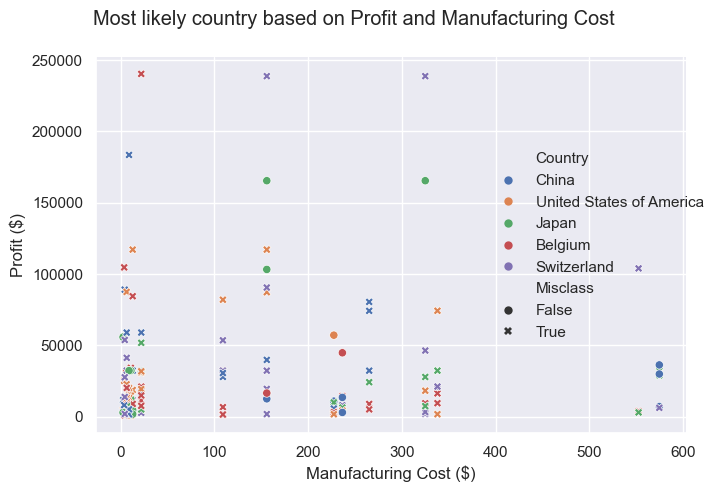

In [71]:
#visualisation
ax = sns.relplot(data=lgtest, x='ManufacturingPrice', y='Profit', hue='Country', style='Misclass')
ax.figure.suptitle('Most likely country based on Profit and Manufacturing Cost')
ax.set_axis_labels('Manufacturing Cost ($)', 'Profit ($)')
ax.figure.tight_layout()
plt.show()

## Demand Modelling using Randomly Generated Numbers

In [66]:
#simple linear regression with visualisation
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as smt
import pandas as pd
import matplotlib.pyplot as plt
import random

#generate two sets of data and put them in a df
dict_new = {'Price': [random.randint(10, 20) for _ in range(40)], 'Demand': [random.randint(1, 500) for _ in range(40)]}

new_df=pd.DataFrame(dict_new)
new_df.head()

,Price,Demand
0,14,227
1,12,489
2,13,167
3,16,141
4,20,331


The model predicts the Demand to be 216.10 when the Price is £16.


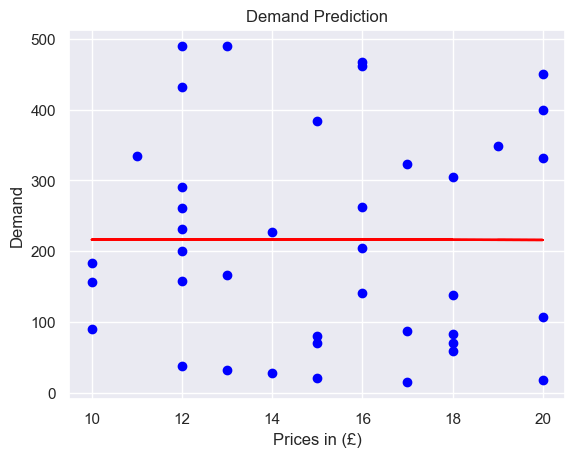

In [72]:
#define variables
x_var=new_df[['Price']]
y_var=new_df['Demand']


#fit the model in linear regression
lnr=LinearRegression()
modl=lnr.fit(x_var, y_var)

#predict the values
pred_df=pd.DataFrame({'Price':[16]})
pred_val=modl.predict(pred_df)
print(f'The model predicts the Demand to be {pred_val[0]:.2f} when the Price is £16.')

#plot the data
plt.scatter(x_var, y_var, color='blue')
plt.plot(x_var, modl.predict(x_var), color='red')
plt.xlabel('Prices in (£)')
plt.ylabel('Demand')
plt.title('Demand Prediction')
plt.show()